<a href="https://colab.research.google.com/github/dzhamalovas/DS/blob/main/%D0%94%D0%B6%D0%B0%D0%BC%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0_14_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Модель регрессии

In [ ]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Этап 1. Загрузка данных из модуля datasets библиотеки Scikit-learn

In [ ]:
# если код, написанный ранее перестанет работать, просто запустите эту ячейку
# на выходе вы получите уже сформированный датафрейм
performance_df = pd.read_csv('/content/StudentPerformanceFactors.csv')
performance_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# посмотрим с каким типом переменных нам предстоит работать
# для этого есть метод .info()
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# посмотрим на основные статистические показатели (summary statistics)
# с помощью метода .describe()
performance_df.describe().round(2)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00
mean,19.98,79.98,7.03,75.07,1.49,2.97,67.24
std,5.99,11.55,1.47,14.40,1.23,1.03,3.89
min,1.00,60.00,4.00,50.00,0.00,0.00,55.00
25%,16.00,70.00,6.00,63.00,1.00,2.00,65.00
50%,20.00,80.00,7.00,75.00,1.00,3.00,67.00
75%,24.00,90.00,8.00,88.00,2.00,4.00,69.00
max,44.00,100.00,10.00,100.00,8.00,6.00,101.00


### Этап 2. Предварительная обработка данных

In [ ]:
# проверим, есть ли пропущенные значения
performance_df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Удаляем столбцы с пропущенными значениями
performance_df = performance_df.dropna(axis=1)

performance_df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


### Этап 3. Исследовательский анализ данных (Exploratory Data Analysis)

In [ ]:
# Удалим все нечисловые столбцы
performance_numeric_df = performance_df.select_dtypes(include=[np.number])

# Посчитаем коэффициент корреляции для всего датафрейма и округлим значения
corr_matrix = performance_numeric_df.corr().round(2)
corr_matrix


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.00,-0.01,0.01,0.02,-0.01,0.00,0.45
Attendance,-0.01,1.00,-0.02,-0.02,0.01,-0.02,0.58
Sleep_Hours,0.01,-0.02,1.00,-0.02,-0.01,-0.00,-0.02
Previous_Scores,0.02,-0.02,-0.02,1.00,-0.01,-0.01,0.18
Tutoring_Sessions,-0.01,0.01,-0.01,-0.01,1.00,0.02,0.16
Physical_Activity,0.00,-0.02,-0.00,-0.01,0.02,1.00,0.03
Exam_Score,0.45,0.58,-0.02,0.18,0.16,0.03,1.00


In [ ]:
# подготовим данные (поместим столбцы датафрейма в переменные)
x1 = performance_df['Hours_Studied']
x2 = performance_df['Attendance']
y = performance_df['Exam_Score']

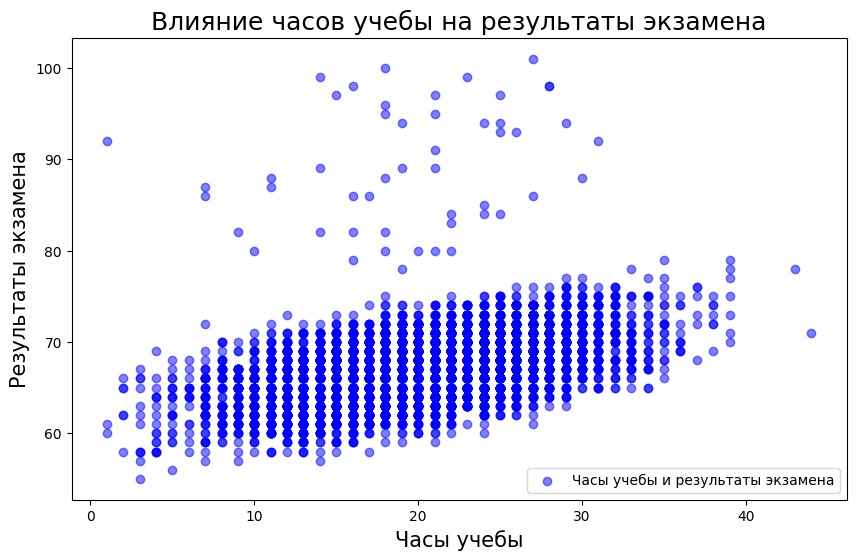

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x1, y, alpha=0.5, label='Часы учебы и результаты экзамена', color='blue')

# добавим подписи
plt.xlabel('Часы учебы', fontsize=15)
plt.ylabel('Результаты экзамена', fontsize=15)
plt.title('Влияние часов учебы на результаты экзамена', fontsize=18)
plt.legend()

# покажем график
plt.show()

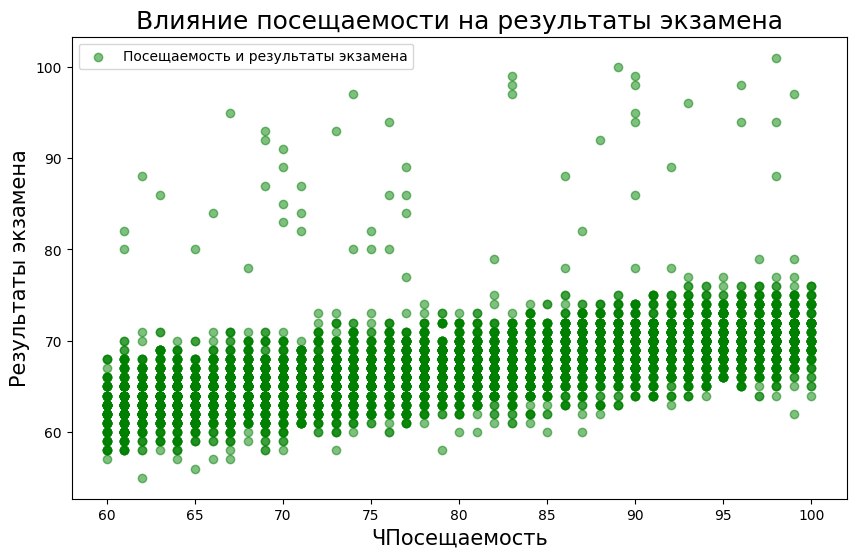

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x2, y, alpha=0.5, label='Посещаемость и результаты экзамена', color='green')

# добавим подписи
plt.xlabel('ЧПосещаемость', fontsize=15)
plt.ylabel('Результаты экзамена', fontsize=15)
plt.title('Влияние посещаемости на результаты экзамена', fontsize=18)
plt.legend()

# покажем график
plt.show()

### Этап 4. Отбор и выделение признаков

In [ ]:
# Выбираем признаки с наибольшей корреляцией
X = performance_df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']]

# Целевая переменная - результаты экзамена
y = performance_df['Exam_Score']

In [ ]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split

# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
# посмотрим на новую размерность обучающей
print(X_train.shape, y_train.shape)

# и тестовой выборки
print(X_test.shape, y_test.shape)

(4624, 4) (4624,)
(1983, 4) (1983,)


### Этап 5. Обучение и оценка качества модели

In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model.predict(X_test)

# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:5])

[65.7845584  67.4173231  68.389149   66.65337007 65.38702827]


In [ ]:
# импортируем модуль метрик
from sklearn import metrics

# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 2.2198508016955705


In [ ]:
# посмотрим на еще одну метрику, R2
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.64


### Дополнительные материалы

Метод .score() класса LinearRegression дает тот же результат, что и метрика r2_score, но для расчета мы передаем ему X_test и y_test.

In [ ]:
metrics.r2_score(y_test, y_pred), model.score(X_test, y_test)

(0.6413575054490861, 0.6413575054490861)

Скорректированный коэффициент детерминации

In [ ]:
# возьмем n и k для тестовых данных
n, k = X_test.shape[0], X_test.shape[1]
n, k

(1983, 4)

In [ ]:
# подставим их в формулу
1 - (1 - model.score(X_test, y_test)) * ((n - 1) / (n - k - 1))

0.6406322425682955

### Упражнения по моим данным

#### Подготовка и исследование данных

**Задание 1**. Вновь загрузите данные.

In [ ]:
performance_df = pd.read_csv('/content/StudentPerformanceFactors.csv')

**Задание 2**. Создайте датафрейм, добавьте целевую переменную и выведите первые семь строк.

In [ ]:
performance_df['Exam_Score'] = performance_df['Exam_Score']

# Вывод первых семи строк
performance_df.head(7)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67


**Задание 3**. Постройте точечную диаграмму.

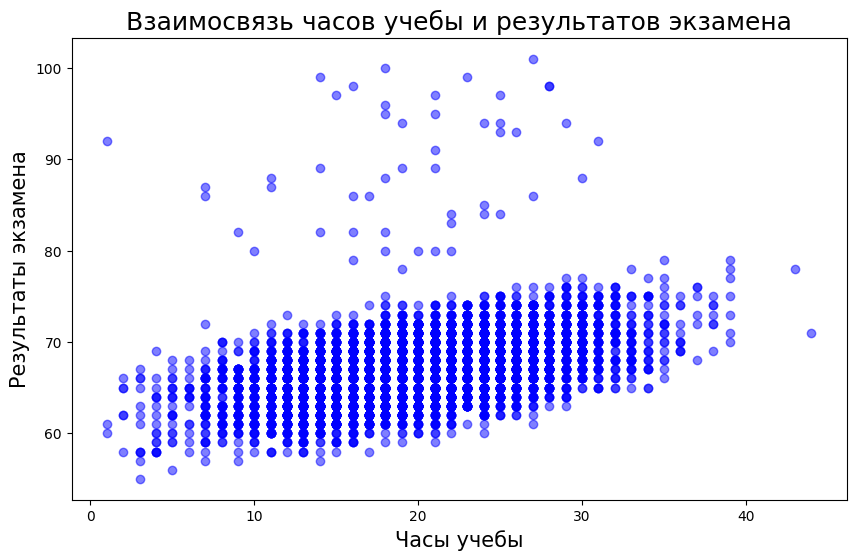

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(performance_df['Hours_Studied'], performance_df['Exam_Score'], alpha=0.5, color='blue')

# Добавим подписи
plt.xlabel('Часы учебы', fontsize=15)
plt.ylabel('Результаты экзамена', fontsize=15)
plt.title('Взаимосвязь часов учебы и результатов экзамена', fontsize=18)

# Покажем график
plt.show()

#### Построение и оценка качества модели

**Задание 4**. Возьмите все признаки и поместите их в переменную `X`. Целевую переменную поместите в переменную `y`.

In [ ]:
performance_df = pd.get_dummies(performance_df, drop_first=True)

In [ ]:
X = performance_df.drop('Exam_Score', axis=1)
y = performance_df['Exam_Score']


**Задание 5**. Разделите выборку на обучающую и тестовую части.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Проверка размерности
print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (4624, 27) (4624,)
Размер тестовой выборки: (1983, 27) (1983,)


**Задание 6**. Постройте модель линейной регрессии. Сделайте прогноз и выведите первые три прогнозных значения.

In [ ]:
from sklearn.linear_model import LinearRegression

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Вывод первых трех прогнозных значений
print("Первые три прогнозных значения:", y_pred[:3])

Первые три прогнозных значения: [64.56480613 65.28386016 71.63400814]


**Задание 7**. Оцените качество модели через RMSE.

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 1.76400714511629


**Задание 8**. Оцените качество модели через $R^2$. Какую долю изменчивости целевой переменной объясняет модель, учитывающая все признаки?

In [ ]:
r2_score = np.round(metrics.r2_score(y_test, y_pred), 2)
print('R2:', r2_score)

R2: 0.77


### Упражнения по изначальным данным

#### Подготовка и исследование данных

**Задание 1**. Вновь загрузите данные по недвижимости в Бостоне.

In [ ]:
boston_df = pd.read_csv('/content/boston.csv')

**Задание 2**. Создайте датафрейм, добавьте целевую переменную и выведите первые семь строк.

In [ ]:
boston_df['MEDV'] = boston_df['MEDV']

# Вывод первых семи строк
boston_df.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


**Задание 3**. Постройте точечную диаграмму с переменными `PTRATIO` и `MEDV`. Какие выводы можно сделать на основе этого графика?

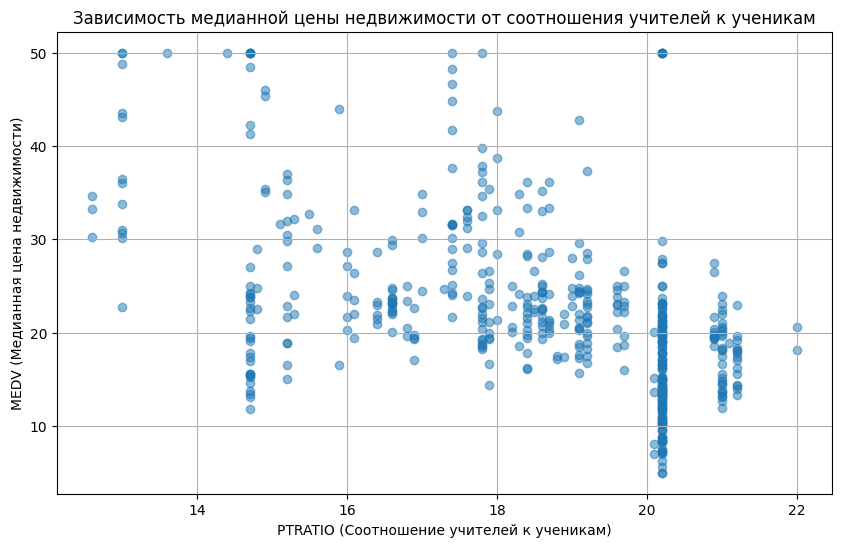

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['PTRATIO'], boston_df['MEDV'], alpha=0.5)
plt.title('Зависимость медианной цены недвижимости от соотношения учителей к ученикам')
plt.xlabel('PTRATIO (Соотношение учителей к ученикам)')
plt.ylabel('MEDV (Медианная цена недвижимости)')
plt.grid(True)
plt.show()

#### Построение и оценка качества модели

**Задание 4**. Возьмите все признаки и поместите их в переменную `X`. Целевую переменную `MEDV` поместите в переменную `y`.

In [ ]:
# Определяем признаки (X) и целевую переменную (y)
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

**Задание 5**. Разделите выборку на обучающую и тестовую части.

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Задание 6**. Постройте модель линейной регрессии. Сделайте прогноз и выведите первые три прогнозных значения.

In [ ]:
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Вывод первых трех прогнозных значений
print(y_pred[:3])

[28.64896005 36.49501384 15.4111932 ]


**Задание 7**. Оцените качество модели через RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Оценка качества модели через RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 4.638689926172818


**Задание 8**. Оцените качество модели через $R^2$. Какую долю изменчивости целевой переменной объясняет модель, учитывающая все признаки?

In [ ]:
from sklearn.metrics import r2_score

# Оценка качества модели через R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')


R²: 0.7112260057484936
